In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
back=pd.read_csv("Data_of_Attack_Back.csv")
back["target"]='Back'

buffer_over=pd.read_csv("Data_of_Attack_Back_BufferOverflow.csv")
buffer_over["target"]='BufferOverflow'

password=pd.read_csv("Data_of_Attack_Back_GuessPassword.csv")
password["target"]='GuessPassword'

neptune=pd.read_csv("Data_of_Attack_Back_Neptune.csv")
neptune["target"]='Neptune'

nmap=pd.read_csv("Data_of_Attack_Back_NMap.csv")
nmap["target"]='NMap'

normal=pd.read_csv("Data_of_Attack_Back_Normal.csv")
normal["target"]='Normal'

port=pd.read_csv("Data_of_Attack_Back_PortSweep.csv")
port["target"]='PortSweep'

root=pd.read_csv("Data_of_Attack_Back_RootKit.csv")
root["target"]='RootKit'

satan=pd.read_csv("Data_of_Attack_Back_Satan.csv")
satan["target"]='Satan'

smurf=pd.read_csv("Data_of_Attack_Back_Smurf.csv")
smurf["target"]='Smurf'



In [3]:
ftp=pd.read_csv("Data_of_Attack_Back_FTPWrite.csv",names=smurf.columns)
ftp["target"]='FTPWrite'

In [4]:
df=pd.concat([back,buffer_over,password,neptune,nmap,normal,port,root,satan,smurf,ftp])

In [5]:
df['attack_flag'] = np.where(df["target"] != 'Normal', 'N', 'A')

## EDA

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 817551 entries, 0 to 7
Data columns (total 43 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   duration                      817551 non-null  float64
 1    protocol_type                817551 non-null  float64
 2    service                      817551 non-null  float64
 3    flag                         817551 non-null  float64
 4    src_bytes                    817551 non-null  float64
 5    dst_bytes                    817551 non-null  float64
 6    land                         817551 non-null  int64  
 7    wrong_fragment               817551 non-null  float64
 8    urgent                       817551 non-null  float64
 9    hot                          817551 non-null  float64
 10   num_failed_logins            817551 non-null  float64
 11   logged_in                    817551 non-null  float64
 12   num_compromised              817551 non-null  float64

In [7]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target,attack_flag
0,0.0,0.0,0.0,0.0,0.5454,0.08314,0,0.0,0.0,0.2,...,0.1,0.0,0.100,0.0,0.0,0.0,0.0,0.0,Back,N
1,0.0,0.0,0.0,0.0,0.5454,0.08314,0,0.0,0.0,0.2,...,0.1,0.0,0.050,0.0,0.0,0.0,0.0,0.0,Back,N
2,0.0,0.0,0.0,0.0,0.5454,0.08314,0,0.0,0.0,0.2,...,0.1,0.0,0.033,0.0,0.0,0.0,0.0,0.0,Back,N
3,0.0,0.0,0.0,0.0,0.5454,0.08314,0,0.0,0.0,0.2,...,0.1,0.0,0.025,0.0,0.0,0.0,0.0,0.0,Back,N
4,0.0,0.0,0.0,0.0,0.5454,0.08314,0,0.0,0.0,0.2,...,0.1,0.0,0.020,0.0,0.0,0.0,0.0,0.0,Back,N


In [8]:
df.describe()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,817551.000000,817551.000000,817551.000000,817551.000000,817551.000000,817551.000000,817551.0,8.175510e+05,817551.000000,817551.000000,...,817551.000000,817551.000000,817551.000000,817551.000000,817551.000000,817551.000000,817551.000000,817551.000000,817551.000000,817551.000000
mean,0.000877,0.000570,0.052909,0.020160,0.004961,0.024862,0.0,3.669496e-07,0.000003,0.002456,...,0.166868,0.161651,0.066795,0.003380,0.006148,0.001683,0.024865,0.024852,0.005372,0.005279
std,0.026636,0.002596,0.096389,0.030959,0.033235,0.066635,0.0,3.317904e-04,0.000805,0.041470,...,0.102058,0.111642,0.043421,0.008557,0.017460,0.003708,0.043062,0.043151,0.021920,0.022070
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000e+00,0.000000,0.000000,...,0.054000,0.017000,0.007000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.002170,0.003670,0.0,0.000000e+00,0.000000,0.000000,...,0.255000,0.255000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.120000,0.070000,0.002990,0.019690,0.0,0.000000e+00,0.000000,0.000000,...,0.255000,0.255000,0.100000,0.006000,0.003000,0.002000,0.014000,0.003000,0.000000,0.000000
max,1.000000,0.020000,0.670000,0.100000,1.000000,1.000000,0.0,3.000000e-01,0.500000,1.000000,...,0.255000,0.255000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000


In [9]:
df['attack_flag'].value_counts()/df.shape[0]

attack_flag
A    0.705412
N    0.294588
Name: count, dtype: float64

In [10]:
df['target'].value_counts()/df.shape[0]

target
Normal            0.705412
Neptune           0.277937
Satan             0.006139
Smurf             0.003678
PortSweep         0.003625
NMap              0.001901
Back              0.001184
GuessPassword     0.000065
BufferOverflow    0.000037
RootKit           0.000012
FTPWrite          0.000010
Name: count, dtype: float64

In [11]:
df.isnull().sum()

duration                        0
 protocol_type                  0
 service                        0
 flag                           0
 src_bytes                      0
 dst_bytes                      0
 land                           0
 wrong_fragment                 0
 urgent                         0
 hot                            0
 num_failed_logins              0
 logged_in                      0
 num_compromised                0
 root_shell                     0
 su_attempted                   0
 num_root                       0
 num_file_creations             0
 num_shells                     0
 num_access_files               0
 num_outbound_cmds              0
 is_host_login                  0
 is_guest_login                 0
 count                          0
 srv_count                      0
 serror_rate                    0
 srv_error_rate                 0
 rerror_rate                    0
 srv_rerror_rate                0
 same_srv_rate                  0
 diff_srv_rate

In [12]:
df.drop_duplicates()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target,attack_flag
0,0.0000,0.0,0.00,0.0,0.54540,0.08314,0,0.0,0.0,0.2,...,0.10,0.0,0.100,0.000,0.0,0.0,0.0,0.0,Back,N
1,0.0000,0.0,0.00,0.0,0.54540,0.08314,0,0.0,0.0,0.2,...,0.10,0.0,0.050,0.000,0.0,0.0,0.0,0.0,Back,N
2,0.0000,0.0,0.00,0.0,0.54540,0.08314,0,0.0,0.0,0.2,...,0.10,0.0,0.033,0.000,0.0,0.0,0.0,0.0,Back,N
3,0.0000,0.0,0.00,0.0,0.54540,0.08314,0,0.0,0.0,0.2,...,0.10,0.0,0.025,0.000,0.0,0.0,0.0,0.0,Back,N
4,0.0000,0.0,0.00,0.0,0.54540,0.08314,0,0.0,0.0,0.2,...,0.10,0.0,0.020,0.000,0.0,0.0,0.0,0.0,Back,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3,0.0000,0.0,0.14,0.0,0.00000,0.00005,0,0.0,0.0,0.0,...,0.10,0.0,0.100,0.002,0.0,0.0,0.0,0.0,FTPWrite,N
4,0.0032,0.0,0.07,0.0,0.00104,0.00449,0,0.0,0.0,0.2,...,0.10,0.0,0.100,0.000,0.0,0.0,0.0,0.0,FTPWrite,N
5,0.0067,0.0,0.34,0.0,0.00157,0.02703,0,0.0,0.1,0.0,...,0.05,0.1,0.050,0.000,0.0,0.0,0.0,0.0,FTPWrite,N
6,0.0000,0.0,0.14,0.0,0.00676,0.00000,0,0.0,0.0,0.0,...,0.10,0.0,0.100,0.050,0.0,0.0,0.0,0.0,FTPWrite,N


## Data Cleaning

In [13]:
df=df.drop_duplicates()

In [14]:
from sklearn.preprocessing import LabelEncoder

In [15]:
cat_col=['target','attack_flag']

In [16]:
from sklearn.preprocessing import LabelEncoder
label_mapping={}
for col in cat_col:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    d = dict(zip(le.classes_,sorted(df[col].unique())))
    label_mapping.update(d)

In [17]:
label_mapping

{'Back': 0,
 'BufferOverflow': 1,
 'FTPWrite': 2,
 'GuessPassword': 3,
 'NMap': 4,
 'Neptune': 5,
 'Normal': 6,
 'PortSweep': 7,
 'RootKit': 8,
 'Satan': 9,
 'Smurf': 10,
 'A': 0,
 'N': 1}

# Binomial Classification

## Feature Selection

In [18]:
X = df.drop('attack_flag', axis=1)  # Features
y = df['attack_flag']

## Splitting the dataset

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42,stratify=y)

## Feature Scaling

In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Fitting the model

In [21]:
from sklearn.linear_model import LogisticRegression

# Initialize the model
model = LogisticRegression(class_weight="balanced")

# Train the model on the training data
model.fit(X_train, y_train)

LogisticRegression(class_weight='balanced')

## Predictions

In [22]:
y_pred = model.predict(X_test)

## Evaluate the Model

In [23]:
from sklearn.metrics import accuracy_score, classification_report

print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
# Detailed classification report
print(classification_report(y_test, y_pred))

Accuracy: 0.9970032536103659
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    173013
           1       0.99      1.00      0.99     72253

    accuracy                           1.00    245266
   macro avg       1.00      1.00      1.00    245266
weighted avg       1.00      1.00      1.00    245266



## Visualize Model Performance

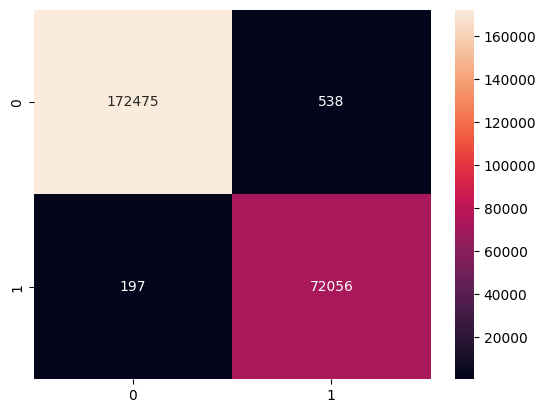

In [24]:
from sklearn.metrics import confusion_matrix

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.show()

# Multinomial Classification

## Feature Selection

In [25]:
X = df.drop('target', axis=1)  # Features
y = df['target']

## Splitting the dataset

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)

## Scaling the features

In [27]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Fitting the model

In [28]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the model
model = RandomForestClassifier(class_weight='balanced')

# Train the model on the training data
model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced')

## Make Predictions

In [29]:
y_pred = model.predict(X_test)

## Evaluate the model

In [30]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Accuracy
accuracy = accuracy_score(y_test, y_pred)

# Precision, Recall, F1 for each class
precision = precision_score(y_test, y_pred,average='macro')  # 'macro' for unweighted average across classes
recall = recall_score(y_test, y_pred,average='macro')
f1 = f1_score(y_test, y_pred,average='macro')

print(f"Accuracy macro average: {accuracy}")
print(f"Precision macro average: {precision}")
print(f"Recall macro average: {recall}")
print(f"F1 Score macro average: {f1}")


Accuracy macro average: 0.9999388420350924
Precision macro average: 0.7990340890023245
Recall macro average: 0.7870987744935397
F1 Score macro average: 0.7925142581054824


C:\Users\faiza\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## Visualize Model Performance

In [31]:
class_names={'Back': np.int64(0),
 'BufferOverflow': np.int64(1),
 'FTPWrite': np.int64(2),
 'GuessPassword': np.int64(3),
 'NMap': np.int64(4),
 'Neptune': np.int64(5),
 'Normal': np.int64(6),
 'PortSweep': np.int64(7),
 'RootKit': np.int64(8),
 'Satan': np.int64(9),
 'Smurf': np.int64(10)}

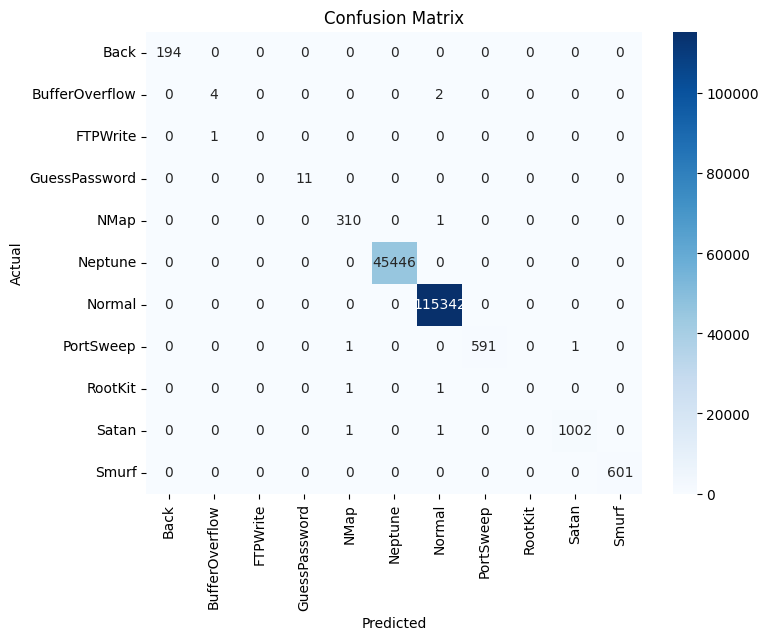

In [32]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


In [33]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred, target_names=class_names)
print(report)


C:\Users\faiza\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\faiza\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


                precision    recall  f1-score   support

          Back       1.00      1.00      1.00       194
BufferOverflow       0.80      0.67      0.73         6
      FTPWrite       0.00      0.00      0.00         1
 GuessPassword       1.00      1.00      1.00        11
          NMap       0.99      1.00      0.99       311
       Neptune       1.00      1.00      1.00     45446
        Normal       1.00      1.00      1.00    115342
     PortSweep       1.00      1.00      1.00       593
       RootKit       0.00      0.00      0.00         2
         Satan       1.00      1.00      1.00      1004
         Smurf       1.00      1.00      1.00       601

      accuracy                           1.00    163511
     macro avg       0.80      0.79      0.79    163511
  weighted avg       1.00      1.00      1.00    163511



C:\Users\faiza\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
